# Fiction versus Nonfiction: The linguistic analysis of "The Wreck of the Titan" and "A Night to Remember"

---

<h2>Table of contents</h2>
<ol>
    <li>Introduction</li>
    <li>Preparing the data</li>
    <li>Linguistic Analysis</li>
    <ol>
        <li>Most frequent words</li>
        <li>Concordance</li>
        <li>Lexical Dispersion</li>
        <li>POS Tagging</li>
        <li>Entity Recognition</li>
    </ol>
    <li> Conclusion</li>
    <li>Packages used</li>
</ol>

---

## Introduction

The RMS Titanic left Southampton on April 10th 1912 bound for New York. Unfortunately, on April 14th 1912 at 23:40 she struck an iceberg and sunk 2 hours and 40 minutes later. Nowadays, it is the most well-known maritime disaster. There are a couple of reasons why: it was the sinking with the most amount of casualties during peacetime, she sunk on her maiden voyage with very prestigious passengers onboard and her sinking made the authorities change regulations of maritime transport.

<img src = "https://upload.wikimedia.org/wikipedia/commons/8/86/Titanic_Ireland.jpg" width ="50%">

It is commonly thought that the Titanic was the biggest and most luxurious ship at the time but it is only half-true. The Titanic had an older sistership with the same dimensions but lower tonnage. The departure of the Titanic was also not as big of an event as it is shown in popular culture. However, the sinking made her famous and the media keep her story alive.

The most widely known is the film "Titanic" directed by James Cameron. For some time it was the highest-grossing film, even today it is still on the list.

In [175]:
# Getting a table from Wikipedia
from bs4 import BeautifulSoup
import requests

url_films="https://en.wikipedia.org/wiki/List_of_highest-grossing_films"
html_films = requests.get(url_films).text
soup_films = BeautifulSoup(html_films, "lxml")

films = soup_films.find_all("table", attrs={"class": "wikitable"})

In [176]:
table_films = films[0]
body_films = table_films.find_all("tr")
head_films = body_films[0]
body_rows_films = body_films[1:]

headings_films = []
for item_films in head_films.find_all("th"):
    item_films = (item_films.text).rstrip("\n")
    headings_films.append(item_films)

In [177]:
import re
import pandas as pd

all_rows_films = []
for row_num in range(10):
    row_films = []
    for row_item_films in body_rows_films[row_num].find_all(["td","th"]):
        af = re.sub("(\xa0)|(\n)","",row_item_films.text)
        row_films.append(af)
    all_rows_films.append(row_films)

print("Highest Grossing Films")
df_films = pd.DataFrame(data=all_rows_films,columns=headings_films)
df_films.head()

# Table does not display correctly on GitHub

Highest Grossing Films


,Rank,Peak,Title,Worldwide gross,Year,Reference(s)
0,1,1,Avatar,"$2,847,246,203",2009,[# 1][# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4]
2,3,1,Titanic,"$2,187,425,379",1997,[# 5][# 6]
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7][# 8]
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9][# 10]


"Titanic" 1997 is hardly the first to tell the story of the doom of the Titanic. There were many other attempts to capture the events of this unlucky voyage. The book, which is known by every Titanic enthusiast, called **"A Night to Remember"** basically 'revived' the Titanic after the World Wars.

<img src = "https://images-na.ssl-images-amazon.com/images/I/71tYqRZXzgL.jpg" width="30%">

In [178]:
# Getting an infobox from Wikipedia about "A Night to Remember"
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

url_antr="https://en.wikipedia.org/wiki/A_Night_to_Remember_(book)"
html_antr = requests.get(url_antr).text
soup_antr = BeautifulSoup(html_antr, "lxml")

antr_wiki = soup_antr.find_all("table", attrs={"class": "infobox"})

table_antr = antr_wiki[0]
body_antr = table_antr.find_all("tr")
head_antr = body_antr[0]
body_rows_antr = body_antr[1:]

all_rows_antr = []
for row_num in range(len(body_rows_antr)):
    row_antr = []
    for row_item_antr in body_rows_antr[row_num].find_all(["td","th"]):
        aa = re.sub("(\xa0)|(\n)|,","",row_item_antr.text)
        row_antr.append(aa)
    all_rows_antr.append(row_antr)

print("A Night to Remember")
df_antr = pd.DataFrame(data=all_rows_antr)
df_antr.head()

A Night to Remember


,0,1
0,Author,Walter Lord
1,Country,United States
2,Language,English
3,Subject,Sinking of the RMS Titanic
4,Genre,History


**"A Night to Remember"** by Walter Lord is a book based on actual events. The author interviewed the survivors to provide an account of the events. Since the publication of the book, a lot of new facts came to light (e.g. the breakage of the ship - not confirmed until 1988, thus not included in the book) but it is still one of the most read books about the disaster.

Interestingly, there is a fictional novella that is often claimed to have foretold the disaster. **"The Wreck of the Titan: Or, Futility"** by Morgan Robertson was published in 1898, 14 years before the Titanic disaster. It tells the story of a man who boarded the ship called "Titan" which was the biggest ship in the world and was thought to be indesctructible. However, Titan struck an iceberg and sunk. As it can be seen on the cover below, this supposed foretelling of the disaster is used as a marketing ploy. 

<img src = "https://images-na.ssl-images-amazon.com/images/I/81h2iF3h1EL.jpg" width ="30%">

In [179]:
# Getting an infobox from Wikipedia about "The Wreck of the Titan"
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

url_twott="https://en.wikipedia.org/wiki/The_Wreck_of_the_Titan:_Or,_Futility"
html_twott = requests.get(url_twott).text
soup_twott = BeautifulSoup(html_twott, "lxml")

twott_wiki = soup_twott.find_all("table", attrs={"class": "infobox"})

table_twott = twott_wiki[0]
body_twott = table_twott.find_all("tr")
head_twott = body_twott[0]
body_rows_twott = body_twott[1:]

all_rows_twott = []
for row_num in range(len(body_rows_twott)):
    row_twott = []
    for row_item_twott in body_rows_twott[row_num].find_all(["td","th"]):
        at = re.sub("(\xa0)|(\n)|,","",row_item_twott.text)
        row_twott.append(at)
    all_rows_twott.append(row_twott)

print("The Wreck of the Titan: Or, Futility")
df_twott = pd.DataFrame(data=all_rows_twott)
df_twott.head()

The Wreck of the Titan: Or, Futility


,0,1
0,Author,Morgan Robertson
1,Country,United States
2,Language,English
3,Publication type,Novella
4,Publication date,1898


---

## Preparing the data

**"The Wreck of the Titan"** is available on <a href="https://www.gutenberg.org/files/24880/24880-h/24880-h.htm">Project Gutenberg</a> and the html version was loaded using *requests* and *BeautifulSoup*.

**"A Night to Remember"** was converted into a .txt format and opened from my disk using an *open* function. 

Both texts were tokenized with *nltk.tokenize* package. The stopwords were removed using *nltk.corpus.stopwords.words* function. Also, module *Text* from the *nltk* package was used.

In [180]:
#The Wreck of the Titan

from nltk.tokenize import RegexpTokenizer
import requests
from bs4 import BeautifulSoup
import re

url_titan = "https://www.gutenberg.org/files/24880/24880-h/24880-h.htm"

req_titan = requests.get(url_titan)
html_titan = req_titan.text

soup_titan = BeautifulSoup(html_titan, "html5lib")
titan_text = soup_titan.get_text()


tokenizer_titan = RegexpTokenizer('\w+')

tokens_titan = tokenizer_titan.tokenize(titan_text)
words_titan = []

for word in tokens_titan:
    words_titan.append(word.lower())

#Tokenization check
words_titan[:8]

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'wreck', 'of']

In [181]:
# Removing stopwords

import nltk
sw = nltk.corpus.stopwords.words('english')

#Stopwords check
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [182]:
words_ns_titan = []

for word in words_titan:
    if word not in sw:
        words_ns_titan.append(word)

words_ns_titan[:5]

['project', 'gutenberg', 'ebook', 'wreck', 'titan']

In [183]:
from nltk import Text

text_titan = nltk.Text(tokens_titan)

In [184]:
# A Night to Rememeber

file = open(r'C:\Users\paupi\OneDrive - University of Gdansk (for Students)\Dokumenty\a-night-to-remember.txt', encoding="utf8")
antr = file.read()

In [185]:
import nltk
from nltk import word_tokenize

tokens_antr = word_tokenize(antr)
words_antr = [w.lower() for w in tokens_antr]
len(tokens_antr)

58695

In [186]:
text_antr = nltk.Text(tokens_antr)

In [187]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = r'C:\Users\paupi\OneDrive - University of Gdansk (for Students)\Dokumenty'
file_antr = PlaintextCorpusReader(corpus_root, 'a-night-to-remember.txt')
file_antr.fileids()

['a-night-to-remember.txt']

In [188]:
w_antr = file_antr.words()

In [189]:
from nltk.tokenize import RegexpTokenizer
import re

tokenizer = RegexpTokenizer('\w+')

tokens_antr = tokenizer.tokenize(antr)
words_antr = []

for word in tokens_antr:
    words_antr.append(word.lower())

words_antr[:8]

['there', 'are', 'certain', 'episodes', 'in', 'the', 'past', 'which']

In [190]:
# Removing stopwords

import nltk

sw = nltk.corpus.stopwords.words('english')

In [191]:
words_ns_antr = []

for word in words_antr:
    if word not in sw:
        words_ns_antr.append(word)

words_ns_antr[:5]

['certain', 'episodes', 'past', 'fix', 'like']

---

## Linguistic Analysis

The following analysis aims to lingusitically compare two texts: **"The Wreck of the Titan"**, which is a fictional story involving a sinking of a ship, and **"A Night to Remember"**, which is based on the real disaster of the Titanic.
The analysis presents the most frequent words of both texts, concordance of chosen words, as well as their lexical dispersion. The texts were POS-tagged and the entities were recognized.

### Most frequent words

By using *FreqDist* from *nltk* packages the list of most common words in both texts was extracted and then turned into a line chart.

In [192]:
# The Wreck of the Titan
freq_titan = nltk.FreqDist(words_ns_titan)
print(freq_titan)

<FreqDist with 7401 samples and 37036 outcomes>


In [193]:
# A Night to Remember

freq_antr = nltk.FreqDist(words_ns_antr)
print(freq_antr)

<FreqDist with 5889 samples and 27477 outcomes>


In [194]:
# The Wreck of the Titan

freq_titan.most_common(25)

[('denman', 340),
 ('said', 317),
 ('one', 264),
 ('forsythe', 245),
 ('deck', 210),
 ('man', 202),
 ('jenkins', 185),
 ('boat', 174),
 ('would', 157),
 ('could', 150),
 ('two', 148),
 ('back', 135),
 ('answered', 131),
 ('florrie', 128),
 ('came', 126),
 ('rowland', 126),
 ('went', 126),
 ('captain', 126),
 ('mr', 124),
 ('sampson', 121),
 ('men', 118),
 ('room', 115),
 ('know', 114),
 ('face', 111),
 ('get', 107)]

In [195]:
# A Night to Remember

freq_antr.most_common(25)

[('boat', 278),
 ('deck', 258),
 ('titanic', 190),
 ('mrs', 172),
 ('ship', 159),
 ('one', 158),
 ('first', 146),
 ('time', 130),
 ('men', 123),
 ('back', 118),
 ('still', 110),
 ('class', 110),
 ('could', 104),
 ('passengers', 100),
 ('water', 98),
 ('night', 92),
 ('man', 92),
 ('people', 91),
 ('room', 90),
 ('boats', 89),
 ('way', 88),
 ('captain', 87),
 ('two', 84),
 ('new', 83),
 ('get', 83)]

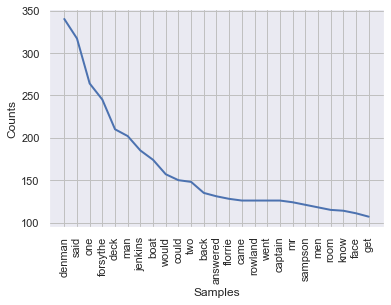

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [196]:
# The Wreck of the Titan

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

freq_titan_line = freq_titan
freq_titan_line.plot(25)

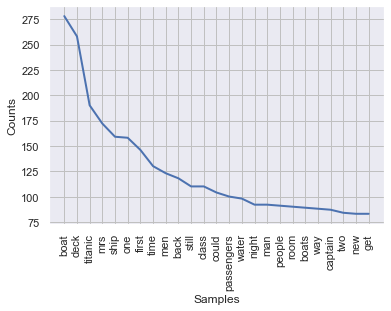

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [197]:
# A Night to Remember

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

freq_antr = nltk.FreqDist(words_ns_antr)
freq_antr.plot(25)

As can be seen in the above charts, in **"The Wreck of the Titan"**, the most frequent word is "Denman", who is one of the characters. Other names of characters on the 25 most frequent words list are: 3. Forsythe, 7. Jenkins, 14. Florrie, 16. Rowland, 19.Sampson, Captain also can be understrood as one of the characters.

In **"A Night to Remember"**, most frequent are words linked to the ship: boat, deck, Titanic, ship.

### Concordance

In [198]:
# The Wreck of the Titan - concordance of "captain"
text_titan.concordance('captain')

Displaying 25 of 126 matches:
 cabin abaft the chart room was the captain the commander who never commanded u
compartments pushed a button marked Captain s Room and crouched down awaiting t
rder In the chart room he found the captain of the Titan pale faced and intense
hands which they had just shown the captain dry Every face from the captain s d
the captain dry Every face from the captain s down wore a look of horror and ex
steerage Is that man back asked the captain Another watchman appeared as he spo
 the forecastles Very well said the captain rising one by one come into my offi
eappearing When Rowland entered the captain seated at a desk motioned him to a 
s name John Rowland he answered The captain wrote it down I understand he said 
nots an hour in a thick fog sir The captain glanced sharply at Rowland and frow
any and help no one On the contrary captain I shall not receive it On the contr
murder at the first opportunity The captain leaned back and stared at the debau
 know of t

In [199]:
# A Night to Remember - concordance of "captain"
text_antr.concordance('captain')

Displaying 25 of 86 matches:
s not anyway realistic to exonerate Captain Smith from the decision to go faste
 by Widener ’ s father in honour of Captain Edward J. Smith , the ship ’ s comm
mith , the ship ’ s commander . The Captain had left early , the ladies had bee
. As the grinding noise died away , Captain Smith rushed on to the bridge from 
ian door of the chart room and told Captain Stanley Lord about it . Lord sugges
nt second steward Wheat … once even Captain Smith . But at no point could the C
d a good laugh . Up on the bridge , Captain Smith tried to piece the picture to
Star , he was more than just senior captain of the line ; he was a bearded patr
 cloud over his head never moved. ’ Captain Smith was a natural leader , and on
e . From then on all was business . Captain Smith sent Boxhall on a fast inspec
amage . This was the last good news Captain Smith heard that night . Still worr
president of the line should know . Captain Smith broke the news about the iceb
ously damag

As it is possible to see in the above concordance of "captain" in both texts. In **"The Wreck of the Titan**, the captain is never named, while in **"A Night to Remember"** the title of the captain is often followed by the surname "Smith" and that is the surname of the Titanic's captain, Edward John Smith, a real, historical figure.

<img src = 'https://upload.wikimedia.org/wikipedia/commons/c/cd/Edward_J._Smith.jpg' width="20%">

Walter Lord in **"A Night to Remember"** mentioned Morgan Robertson and his novel **"The Wreck on the Titan"**.

In [200]:
# A Night to Remember - concordance of "Robertson"
text_antr.concordance('Robertson')

Displaying 6 of 6 matches:
 curious fact : in 1898 one Morgan Robertson wrote a novel about a fabulous lin
8 a struggling author named Morgan Robertson concocted a novel about a fabulous
han any that had ever been built . Robertson loaded his ship with rich and comp
steamer remarkably like the one in Robertson ’ s novel . The new liner was 66,0
ner was 66,000 tons displacement ; Robertson ’ s was 70,000 tons . The real shi
 went down on a cold April night . Robertson called his ship the Titan ; the Wh


### Lexical Dispersion

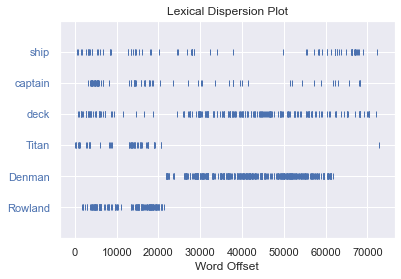

In [201]:
# The Wreck of the Titan

text_titan.dispersion_plot(["ship", "captain", "deck", "Titan", "Denman", "Rowland"])

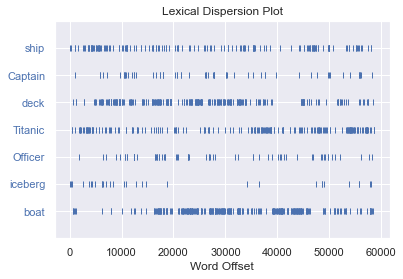

In [206]:
# A Night to Remember

text_antr.dispersion_plot(["ship", "Captain", "deck", "Titanic", "Officer", "iceberg", "boat"])

According to lexical dispersion in **"A Night to Remember"**, "ship", "Captain" and "Titanic" were mentioned often throughout the entire book. In **"The Wreck of the Titan"**, mentions of "ship" and "captain" are accumulated at the beginning and the end of the novella. The name of the ship, "Titan", is mentioned at the beginning and do not appear much in the later part of the story, which shows that the text changes its focus. The Titan sinks in the first part of the novella and from then on, the story takes place on land. It is interesting to see the dispersion of characters' names, at first Rowland was the main character and he was switched with Denman in the later part.

### POS Tagging

In [207]:
#The Wreck of the Titan

pos_titan = nltk.pos_tag(text_titan)

In [208]:
titan_verbs = [x for (x,y) in pos_titan if y in ('VBD','VBN','VBG','VBP')] 
titan_nouns = [x for (x,y) in pos_titan if y in ('NN','NNP','NNS')] 

punc = '''~`!@#$%^&*()_-+={}[];:'"<>,./?\|’‘–…'''

def remove_punc(lis):
    for ele in lis:
        if ele in punc:
            lis.remove(ele)
            
remove_punc(titan_verbs)
remove_punc(titan_nouns)
        
titan_verfreq = nltk.FreqDist(titan_verbs)
titan_noufreq = nltk.FreqDist(titan_nouns)

In [209]:
# A Night to Remember

pos_antr = nltk.pos_tag(text_antr)

In [210]:
antr_verbs = [x for (x,y) in pos_antr if y in ('VBD','VBN','VBG','VBP')] 
antr_nouns = [x for (x,y) in pos_antr if y in ('NN','NNP','NNS')] 

punc = '''~`!@#$%^&*()_-+={}[];:'"<>,./?\|’‘–…'''

def remove_punc(lis):
    for ele in lis:
        if ele in punc:
            lis.remove(ele)
            
remove_punc(antr_verbs)
remove_punc(antr_nouns)

antr_verfreq = nltk.FreqDist(antr_verbs)
antr_noufreq = nltk.FreqDist(antr_nouns)

In [211]:
# The Wreck of the Titan - Verbs
mnt = titan_verfreq.most_common(20)
print(mnt)

[('was', 713), ('had', 459), ('said', 317), ('were', 244), ('are', 191), ('ll', 175), ('came', 126), ('went', 126), ('have', 125), ('did', 114), ('answered', 110), ('do', 99), ('s', 93), ('been', 89), ('ve', 84), ('asked', 83), ('found', 77), ('know', 76), ('re', 73), ('made', 67)]


In [212]:
# A Night to Remember - Verbs
mna = antr_verfreq.most_common(20)

print(mna)

[('was', 887), ('were', 320), ('had', 317), ('s', 105), ('been', 78), ('seemed', 71), ('came', 68), ('told', 66), ('went', 64), ('took', 60), ('asked', 56), ('saw', 55), ('said', 54), ('have', 47), ('looked', 46), ('are', 45), ('called', 44), ('felt', 44), ('did', 42), ('stood', 40)]


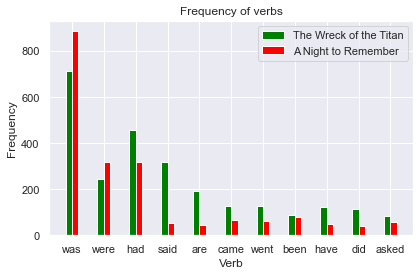

In [213]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['was','were','had','said','are','came','went','been','have','did','asked']
twot_v = [713,244,459,317,191,126,126,89,125,114,83]
antr_v = [887,320,317,54,45,68,64,78,47,42,56]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, twot_v, width, label='The Wreck of the Titan', color='green')
rects2 = ax.bar(x + width/2, antr_v, width, label='A Night to Remember', color='red')

ax.set_ylabel('Frequency')
ax.set_xlabel('Verb')
ax.set_title('Frequency of verbs')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.minorticks_on()

plt.show()

In **"A Night to Remember"**, there are more words related to seeing which are absent in the list of the most frequent verbs of **"The Wreck of the Titan"**: seemed, saw, looked. It is probably due to the effort of relaying the real witness' accounts.

In [214]:
# The Wreck of the Titan - Nouns

print(titan_noufreq.most_common(20))

[('Denman', 340), ('Forsythe', 242), ('deck', 204), ('man', 201), ('Jenkins', 178), ('boat', 173), ('s', 152), ('Florrie', 126), ('Rowland', 124), ('Mr', 123), ('Sampson', 121), ('men', 114), ('room', 113), ('face', 108), ('door', 88), ('time', 85), ('Project', 84), ('Gutenberg', 84), ('bridge', 82), ('ship', 81)]


In [215]:
# A Night to Remember - Nouns

print(antr_noufreq.most_common(20))

[('boat', 253), ('deck', 242), ('Titanic', 184), ('Mrs', 172), ('t', 152), ('ship', 149), ('No', 142), ('time', 124), ('men', 117), ('s', 107), ('passengers', 96), ('water', 93), ('man', 90), ('people', 89), ('night', 87), ('way', 87), ('boats', 86), ('Mr', 82), ('Smith', 75), ('Carpathia', 71)]


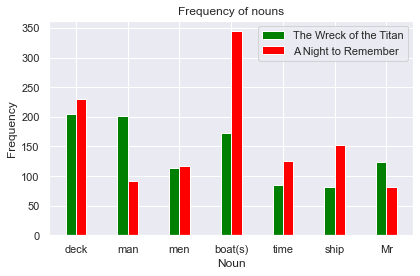

In [216]:
import matplotlib.pyplot as plt

labels = ['deck','man','men','boat(s)','time','ship','Mr']
twot_n = [204,201,114,173,85,81,123]
antr_n = [230,91,117,(257+88),126,152,82]
    
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, twot_n, width, label='The Wreck of the Titan', color='green')
rects2 = ax.bar(x + width/2, antr_n, width, label='A Night to Remember', color='red')

ax.set_ylabel('Frequency')
ax.set_xlabel('Noun')
ax.set_title('Frequency of nouns')
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.minorticks_on()

plt.show()

Most frequent in **"The Wreck of the Titan"** are the names of the characters. In **"A Night to Remember"**, nouns are more related to ship and passengers.

### Entity Recognition

The entity recognition was possible by using the *spacy* package. The data was turned into charts: two pie charts for each text and a grouped bar chart for more efficient comparison.

In [232]:
# The Wreck of the Titan

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

nlp = en_core_web_sm.load()

titan_doc = nlp(titan_text)

In [233]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    titan_res = requests.get(url_titan)
    titan_html = titan_res.text
    titan_soup = BeautifulSoup(titan_html, 'html5lib')
    for script in titan_soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', titan_soup.get_text()))
titan_ny_bb = url_to_string(url_titan)
titan_n = nlp(titan_ny_bb)
len(titan_n.ents)

2733

In [234]:
# A Night to Remember

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

a_nlp = en_core_web_sm.load()

a_doc = nlp(antr)

In [235]:
len(a_doc.ents)

3324

In [236]:
# The Wreck of the Titan

labels_titan = [x.label_ for x in titan_n.ents]
Counter(labels_titan)

Counter({'PERSON': 1151,
         'WORK_OF_ART': 29,
         'PRODUCT': 7,
         'ORG': 317,
         'DATE': 135,
         'GPE': 191,
         'LOC': 24,
         'ORDINAL': 105,
         'CARDINAL': 464,
         'TIME': 152,
         'QUANTITY': 65,
         'NORP': 52,
         'MONEY': 8,
         'LAW': 10,
         'EVENT': 3,
         'FAC': 14,
         'LANGUAGE': 5,
         'PERCENT': 1})

In [237]:
# A Night to Remember

labels = [x.label_ for x in a_doc.ents]
Counter(labels)

Counter({'GPE': 194,
         'EVENT': 7,
         'DATE': 177,
         'LOC': 45,
         'CARDINAL': 645,
         'TIME': 174,
         'FAC': 12,
         'ORDINAL': 239,
         'NORP': 120,
         'PERSON': 1079,
         'ORG': 496,
         'WORK_OF_ART': 26,
         'QUANTITY': 77,
         'MONEY': 14,
         'LANGUAGE': 4,
         'PRODUCT': 14,
         'PERCENT': 1})

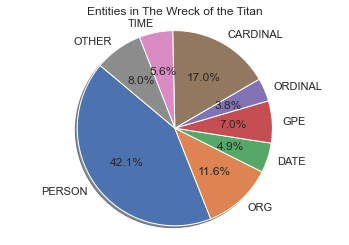

In [238]:
# The Wreck of the Titan

import matplotlib.pyplot as plt

Other = 7+8+3+5+1+10+14+29+24+52+65

labels = 'PERSON', 'ORG','DATE','GPE','ORDINAL','CARDINAL','TIME','OTHER'
sizes = [1151,317,135,191,105,464,152,Other]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')


plt.title('Entities in The Wreck of the Titan')

plt.show()

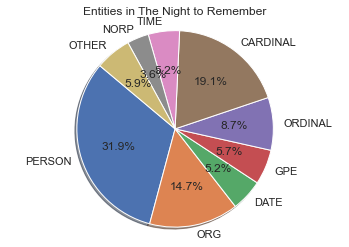

In [239]:
import matplotlib.pyplot as plt


O = 7+45+12+26+77+14+4+14+1


labels = 'PERSON','ORG','DATE','GPE','ORDINAL','CARDINAL','TIME','NORP','OTHER'
sizes = [1079,496,177,194,293,645,174,120,O]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')


plt.title('Entities in The Night to Remember')

plt.show()

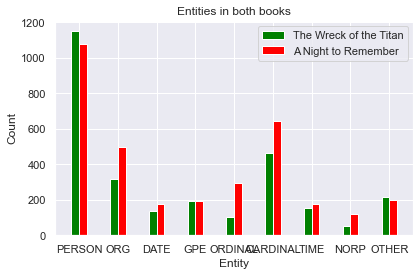

In [240]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['PERSON','ORG','DATE','GPE','ORDINAL','CARDINAL','TIME','NORP','OTHER']
twott = [1151,317,135,191,105,464,152,52,Other]
antr_c = [1079,496,177,194,293,645,174,120,O]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, twott, width, label='The Wreck of the Titan', color='green')
rects2 = ax.bar(x + width/2, antr_c, width, label='A Night to Remember', color='red')

ax.set_ylabel('Count')
ax.set_xlabel('Entity')
ax.set_title('Entities in both books')
ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.minorticks_on()

plt.show()

In both cases, the entities' arrangement is quite similar, although in **"The Wreck of the Titan"**, there are more "PERSON" entities and in **"A Night to Remember"**, ORG, ORDINAL and CARDINAL are more frequent than in the former text.

---

## Conclusion

**"A Night to Remember"** is literary nonfiction. The author relays real events and the writing of the book was proceeded by extensive research. Looking at the above analysis, it can be seen that the content focuses more on the ship. People are treated as a group, eg. "passengers", "men" rather than being named.

**"The Wreck of the Titan"** is a fictional story. As it is seen in the analysis, its focus is put on the characters. Most of them are referred by their names an it is seen in the frequency analysis. The ship and events of the Titan are only part of the plot, a stage for the characters.

---

## Packages used

* BeautifulSoup
* requests
* pandas
* re
* nltk
* matplotlib
* seaborn
* spacy
* collections